In [485]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [503]:
df = sns.load_dataset('titanic')

In [504]:
print('Dimension of data')
rows = df.shape[0]
print('Rows:', rows)

columns = df.shape[1]
print('Columns:', columns)

Dimension of data
Rows: 891
Columns: 15


In [505]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Exploratory Data Analysis

In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [507]:
df.duplicated().sum()

# Check Duplicate values

107

In [508]:
(df.isnull().sum()/len(df))*100
# check null values percentage

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [509]:
# deck column has more than 50% null values so dropping "deck" column

df.drop(columns='deck', axis =1, inplace =True)

In [510]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [511]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [512]:
## now replacing missing values in "age" with mean value

df.age.fillna(df.age.median(), inplace=True)

In [513]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [515]:
df = df.drop(columns=[ "alive", "embark_town", "who", "adult_male", "alone"],axis=1)

In [517]:
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [518]:
survived_from_southampton = df[(df['embarked'] == 'S') & (df['survived'] == 1)]
# Count the number of survivors
num_survivors = len(survived_from_southampton)
num_survivors

217

In [519]:
survived_from_Queenstown = df[(df['embarked'] == 'Q') & (df['survived'] == 1)]
# Count the number of survivors
Q_survivors = len(survived_from_Queenstown)
Q_survivors

30

In [520]:
survived_from_Cherbourg = df[(df['embarked'] == 'C') & (df['survived'] == 1)]
# Count the number of survivors
Q_survivors = len(survived_from_Cherbourg)
Q_survivors

93

## 1 Data Visualisation

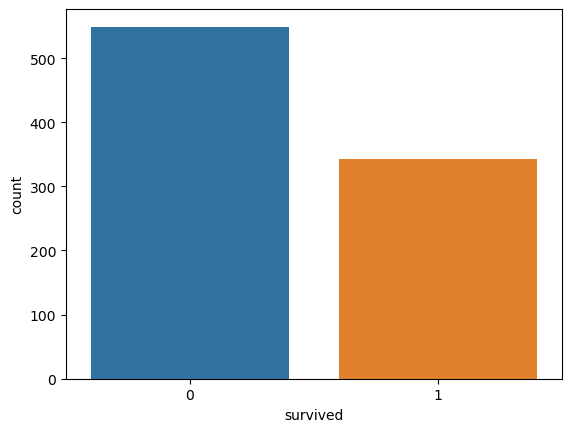

In [521]:
sns.countplot(df.survived)
plt.show()

##checking for survived & non survived cases with countplot

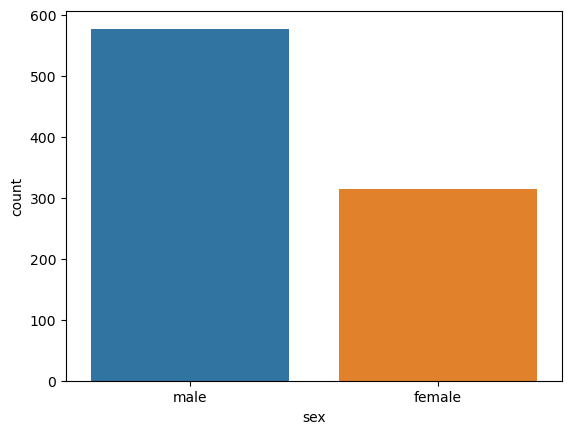

In [522]:
##no of passenger as per gender
sns.countplot('sex', data=df)
plt.show()

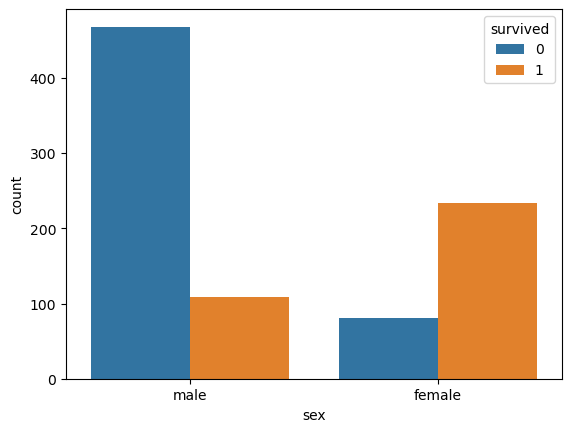

In [523]:
# Check number of survivors and non survivors as per gender 

sns.countplot('sex', hue= 'survived', data=df)
plt.show()

<AxesSubplot:xlabel='pclass', ylabel='count'>

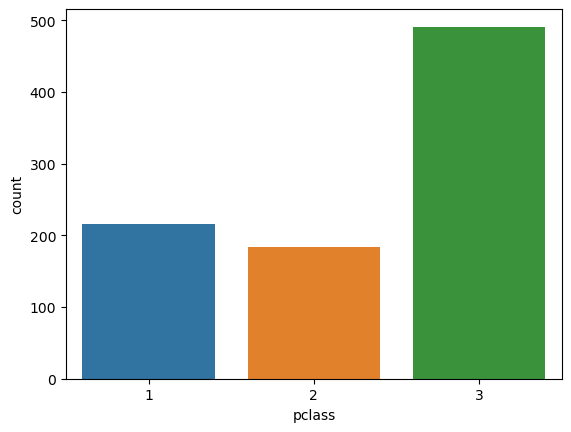

In [524]:
# cheking countplot for "Pclass" column
sns.countplot('pclass', data=df)

<AxesSubplot:xlabel='embarked', ylabel='count'>

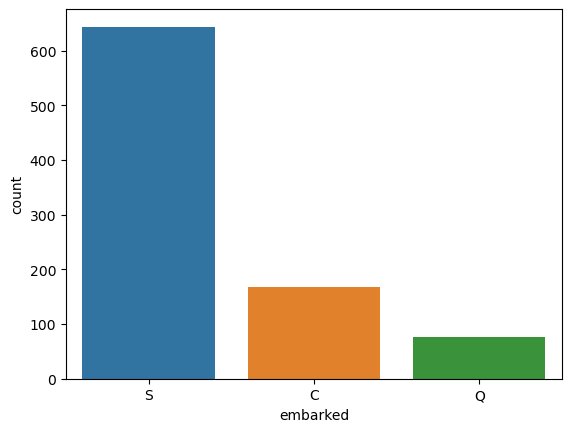

In [525]:
##many people were travelling in 3rd class(lOWER) in Titanic.

sns.countplot('embarked', data=df)

In [526]:
## most of the people have started their journey from Southampton (S).

### Checking numerical attributes

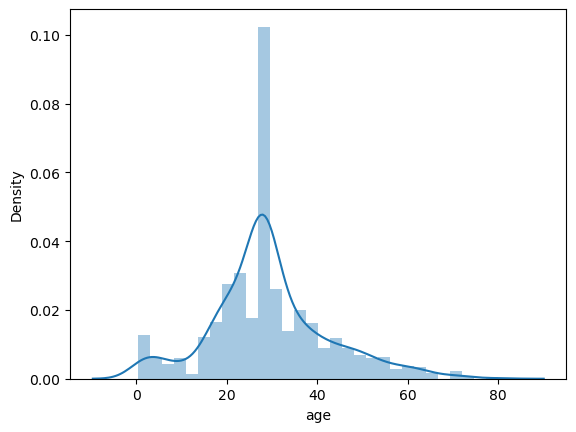

In [527]:
sns.distplot(df['age'])
plt.show()

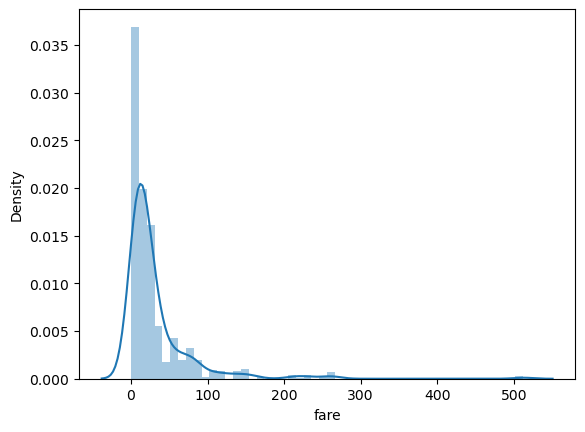

In [529]:
#checking for Fare column
sns.distplot(df['fare'])
plt.show()

## HeatMap to check correlation

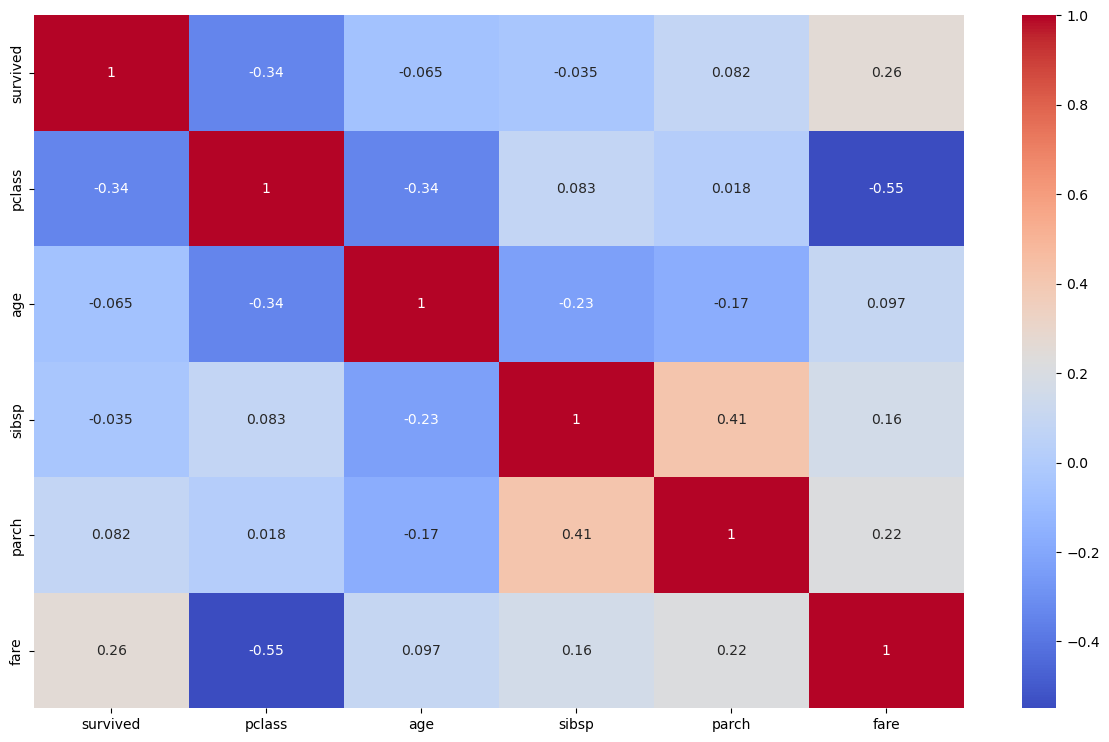

In [530]:
corr = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [406]:
df.dropna(inplace=True)

## Encoding Label

In [407]:
df["Sex"].value_counts()

male      265
female    152
Name: Sex, dtype: int64

In [408]:
df['Embarked'].value_counts()

S    269
C    102
Q     46
Name: Embarked, dtype: int64

In [532]:
df['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [533]:
from sklearn.preprocessing import LabelEncoder
cols = ['sex', 'embarked', 'class']
le = LabelEncoder()

for i in cols:
    df[i] = le.fit_transform(df[i])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,2,2
3,1,1,0,35.0,1,0,53.1000,2,0
4,0,3,1,35.0,0,0,8.0500,2,2


In [535]:
x = df.drop(columns='survived', axis =1)
y= df['survived']

In [536]:
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size=0.2, random_state=2)

In [537]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(712, 8) (179, 8) (712,) (179,)


## Model Training

## Building a Logistic Regression model

In [538]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [539]:
lr = LogisticRegression()

In [540]:
df.dropna(inplace=True)

In [541]:
#training the Logistic Regression model with training data
lr.fit(x_train, y_train)

LogisticRegression()

In [542]:
#accuracy on training data
x_train_prediction = lr.predict(x_train)

In [543]:
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print('Accuracy_score_of_training_data : ', training_data_accuracy)

Accuracy_score_of_training_data :  0.8103932584269663


In [544]:
# accuracy on test data
x_test_pred= lr.predict(x_test)

In [545]:
print(x_test_pred)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [546]:
test_data_accuracy = accuracy_score(y_test, x_test_pred)
print('Accuracy_score_of_test data : ', test_data_accuracy)

Accuracy_score_of_test data :  0.7821229050279329


## Build A Rondom Forest Model

In [547]:
from sklearn.ensemble import RandomForestClassifier

In [557]:
rf = RandomForestClassifier()

In [558]:
# Create a Random Forest classifier and train it
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [559]:
rf.score(x_train,y_train)

0.9859550561797753

In [560]:
from sklearn.metrics import classification_report

# Predict on test data
y_pred = final_model.predict(x_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 81.01%


In [561]:
model_feature = rf.fit(x_train,y_train)

In [569]:
features = pd.DataFrame({'imp':(model_feature.feature_importances_ * 100),
                         'Features':x_train.columns}).sort_values('imp', ascending=False)

In [570]:
features

,imp,Features
1,26.748473,sex
5,25.900976,fare
2,25.320683,age
3,4.908386,sibsp
0,4.724466,pclass
7,4.515000,class
4,4.123955,parch
6,3.758060,embarked


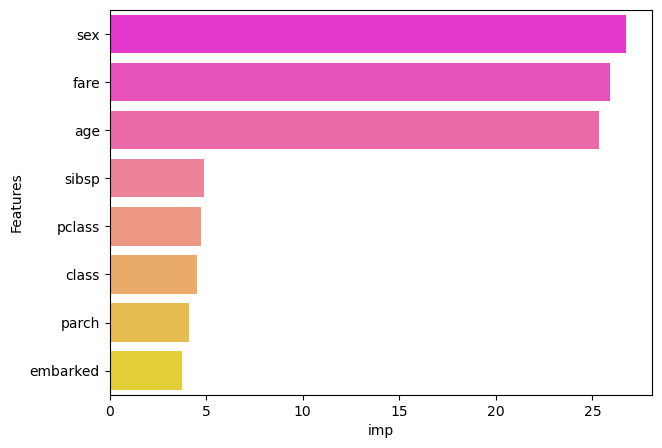

In [571]:
plt.figure(figsize=(7,5))
sns.barplot(x=features['imp'][:10],
            y=features['Features'][:10],
            palette='spring')
plt.show()

In [572]:
# Here is a Best Feature or estimators of Titanic Survival Dataset.
# In which the best Feature is "Fare" and "Sex"